In [1]:
import matplotlib.pyplot as plt
import os
# Global Settings for Matplotlib
plt.rcParams.update({
    'text.usetex': True,              # Enable LaTeX rendering for text
    'font.family': 'serif',           # Set font family
    'font.size': 16,                  # General font size
    'lines.markersize': 10,           # Default marker size
    'legend.fontsize': 'small',       # Legend font size
    'legend.frameon': False,          # Remove frame around legend
    'figure.figsize': (6, 4),         # Default figure size
    'axes.grid': True,                # Enable grid for axes
    'grid.alpha': 0.1,                # Set grid transparency
    'grid.linestyle': '--',           # Set grid line style
    'grid.color': 'gray',             # Set grid line color
    'axes.grid.which': 'both',        # Enable both major and minor gridlines
    'axes.grid.axis': 'both',         # Apply grid to both x and y axes
    'axes.labelsize': 18,             # Font size for axis labels
    'xtick.labelsize': 13,            # Font size for x-axis tick labels
    'ytick.labelsize': 13             # Font size for y-axis tick labels
})


user_home = os.path.expanduser("~")
graphs = user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\\'

In [2]:

def fisher_matrix(t, w, a, shots):
    def p(t, w, a):

        return 1 / 2 * (1 + np.cos(w * t) * np.exp(-a * t))

    def pw(t, w, a):
        return - 1 / 2 * t * np.sin(w * t) * np.exp(-a * t)

    def pww(t, w, a):
        return - 1 / 2 * t ** 2 * np.cos(w * t) * np.exp(-a * t)

    def pa(t, w, a):
        return - 1 / 2 * t * np.cos(w * t) * np.exp(-a * t)

    def paa(t, w, a):
        return 1 / 2 * t ** 2 * np.cos(w * t) * np.exp(-a * t)

    def paw(t, w, a):
        return 1 / 2 * t ** 2 * np.sin(w * t) * np.exp(-a * t)
    Iww = 0
    Iaa = 0
    Iwa = 0

    for i in range(len(t)):
        p0 = p(t[i], w, a)
        p1 = 1 - p0
        pw0 = pw(t[i], w, a)
        pw1 = -pw0
        pww0 = pww(t[i], w, a)
        pww1 = -pww0
        pa0 = pa(t[i], w, a)
        pa1 = -pa0
        paa0 = paa(t[i], w, a)
        paa1 = -paa0
        paw0 = paw(t[i], w, a)
        paw1 = -paw0

        if p0 == 0:
            p0 = 1e-10
        if p1 == 0:
            p1 = 1e-10

        Iww += shots[i] * (p0 * ((pw0 ** 2) / p0 ** 2) + p1 * ((pw1 ** 2) / p1 ** 2))
        Iaa += shots[i] * (p0 * ((pa0 ** 2) / p0 ** 2) + p1 * ((pa1 ** 2) / p1 ** 2))
        Iwa += shots[i] * (p0 * ((pw0 * pa0) / p0 ** 2) + p1 * ((pw1 * pa1) / p1 ** 2))
    return np.array([[Iww, Iwa], [Iwa, Iaa]])


def rao_bound_complex(T, a, sigma):
    I = 0
    for t in T:
        I += 1 / (sigma ** 2) * t ** 2 * np.exp(-2 * t * a)
    bound = 1 / np.sqrt(I)
    return bound


def rao_bound(T, w, a, shots):
    f_mat = fisher_matrix(T, w, a, shots)
    try :
        inv = np.linalg.inv(f_mat)
    except:
        return 100
    # inv = np.linalg.inv(f_mat)
    inv = inv.reshape(2,2)
    w_var = np.sqrt(inv[0, 0])
    a_var = np.sqrt(inv[1, 1])
    #
    # return w_var
    return a_var, w_var
    # return np.mean([w_var/w, a_var/a])
    # w_var = inv[0, 0]
    # a_var = inv[1, 1]
    # return np.sqrt(np.mean([w_var, a_var]))


def rao_bound_gausian(T, w, a, sigma):
    # Idw = 0
    # Ida = 0

    Iww = 0
    Iaa = 0
    Iwa = 0

    for t in T:
        # Idw += -t*np.sin(w*t)*np.exp(-a*t)
        # Ida += -t*np.cos(w*t)*np.exp(-a*t)
        Iww += t**2*np.sin(w*t)**2*np.exp(-2*a*t)
        Iaa += t**2*np.cos(w*t)**2*np.exp(-2*a*t)
        Iwa += t**2*np.sin(w*t)*np.cos(w*t)*np.exp(-2*a*t)

    Iww /= sigma**2
    Iaa /= sigma**2
    Iwa /= sigma**2
    f_mat = np.array([[Iww, Iwa], [Iwa, Iaa]])


    try :
        inv = np.linalg.inv(f_mat)
    except:
        return 100 , 100
    # inv = np.linalg.inv(f_mat)
    # inv = inv.reshape(2,2)
    w_var = np.sqrt(inv[0, 0])
    a_var = np.sqrt(inv[1, 1])
    return a_var, w_var

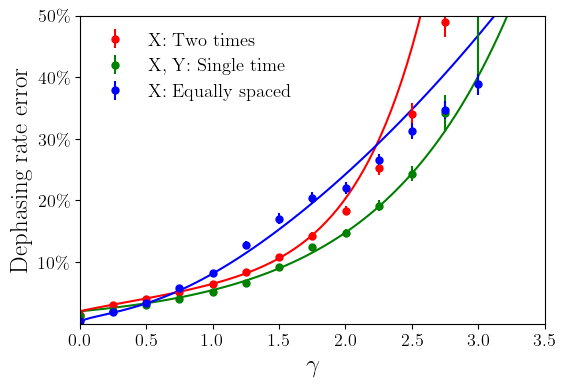

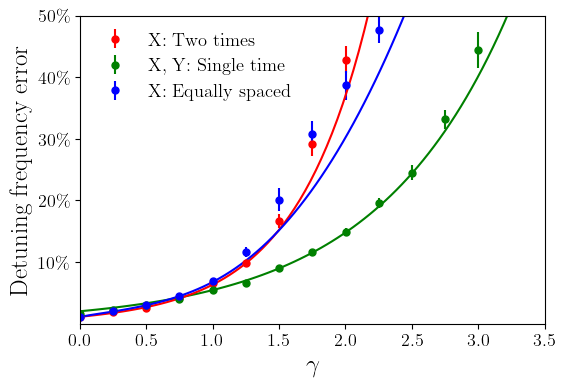

In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# Analytical calculations for error bounds
# Load datasets
a_file = pd.read_excel(graphs + 'stability-Decay_a.xlsx')
w_file = pd.read_excel(graphs + 'stability-Decay_w.xlsx')

# Assign columns to variables for "a" dataset
shots_a = a_file["shots"].values
Decay_a = a_file["Decay"].values
errors_fisher_median_a = a_file["errors_fisher_median_a"].values
errors_fisher_std_a = a_file["errors_fisher_std_a"].values
errors_local_median_a = a_file["errors_local_median_a"].values
errors_local_std_a = a_file["errors_local_std_a"].values
errors_uniform_median_a = a_file["errors_uniform_median_a"].values
errors_uniform_std_a = a_file["errors_uniform_std_a"].values
errors_uniform_X_median_a = a_file["errors_uniform_X_median_a"].values
errors_uniform_X_std_a = a_file["errors_uniform_X_std_a"].values

# Assign columns to variables for "w" dataset
shots_w = w_file["shots"].values
Decay_w = w_file["Decay"].values
errors_fisher_median_w = w_file["errors_fisher_median_w"].values
errors_fisher_std_w = w_file["errors_fisher_std_w"].values
errors_local_median_w = w_file["errors_local_median_w"].values
errors_local_std_w = w_file["errors_local_std_w"].values
errors_uniform_median_w = w_file["errors_uniform_median_w"].values
errors_uniform_std_w = w_file["errors_uniform_std_w"].values
errors_uniform_X_median_w = w_file["errors_uniform_X_median_w"].values
errors_uniform_X_std_w = w_file["errors_uniform_X_std_w"].values

# Plot settings
plt.figure()


N = 5000
t_max = np.pi
samples = 20
t = 1
t_fisher = [0.4439410861020235, 1.784695781691183]
T_many = np.linspace(0, t_max, samples)

sigma_single = 1 / np.sqrt(N/2)
sigma_many = 1 / np.sqrt((N/2) / (samples))
sigma_fisher = 1 / np.sqrt(N/2)
Gamma = np.linspace(0, 4, 100)


def plot_a(i):
    error_single = []
    error_many = []
    error_fisher_full = []
    error_fisher_g = []
    error_many_x = []
    for g in Gamma:
        error_single.append(rao_bound_complex([t], g, sigma_single))
        error_many.append(rao_bound_complex(T_many, g, sigma_many))
        error_fisher_full.append(rao_bound(t_fisher, 1, g, [N/2, N/2])[i])
        # a = [N/ samples] * samples
        error_many_x.append(rao_bound(T_many,1, g, [N/ samples] * samples)[i])
        # error_fisher_g.append(rao_bound_gausian(t_fisher, 1, g, sigma_fisher)[i])

    plt.plot(Gamma, error_single, color='green')
    # plt.plot(Gamma, error_many, color='blue')
    plt.plot(Gamma, error_fisher_full, color = 'red')
    plt.plot(Gamma, error_many_x, color='blue')


    # plt.plot(Gamma, error_fisher, label='Fisher', color='orange')

# Plot error bars for "a" dataset
plot_a(0)
# plt.errorbar(Decay_a, np.array(errors_uniform_median_a), yerr=np.array(errors_uniform_std_a),
#              fmt='o', color='blue', label='X,Y: Equally spaced', markersize=5)
plt.errorbar(Decay_a, np.array(errors_fisher_median_a), yerr=np.array(errors_fisher_std_a),
             fmt='o', color='red', label='X: Two times', markersize=5)
plt.errorbar(Decay_a, np.array(errors_local_median_a), yerr=np.array(errors_local_std_a), fmt='o',
             color='green', label='X, Y: Single time', markersize=5)
plt.errorbar(Decay_a, np.array(errors_uniform_X_median_a), yerr=np.array(errors_uniform_X_std_a),
             fmt='o', color='blue', label='X: Equally spaced', markersize=5)

plt.xlabel(r'$\gamma$')
plt.ylabel('Dephasing rate error')
plt.legend()
plt.xlim([0, 3.5])
plt.ylim([0, 0.5])
plt.yticks([0.1, 0.2,0.3,0.4,0.5], [r'10\%', r'20\%', r'30\%',r'40\%', r'50\%'])
plt.grid(False)
plt.savefig(os.path.join(graphs, "decay_errors_optimal_a.png"))
plt.figure()
# plt.errorbar(Decay_w, np.array(errors_uniform_median_w), yerr= np.array(errors_uniform_std_w),
#              fmt='o', color='blue', label='X,Y: Equally spaced', markersize=5)
plt.errorbar(Decay_w, np.array(errors_fisher_median_w), yerr= np.array(errors_fisher_std_w ),
             fmt='o', color='red', label='X: Two times', markersize=5)
plt.errorbar(Decay_w,  np.array(errors_local_median_w), yerr= np.array(errors_local_std_w ), fmt='o',
             color='green', label='X, Y: Single time', markersize=5)
plt.errorbar(Decay_w, np.array(errors_uniform_X_median_w), yerr= np.array(errors_uniform_X_std_w),
             fmt='o', color='blue', label='X: Equally spaced', markersize=5)
plot_a(1)
# Final plot adjustments
plt.xlabel(r'$\gamma$')
plt.ylabel('Detuning frequency error')
plt.legend()
plt.xlim([0, 3.5])
plt.ylim([0, 0.5])
plt.yticks([0.1, 0.2,0.3,0.4,0.5], [r'10\%', r'20\%', r'30\%',r'40\%', r'50\%'])

# plt.tight_layout()
plt.grid(False)
plt.savefig(os.path.join(graphs, "decay_errors_optimal_w.png"))
plt.show()
# print([(Decay_w[i], errors_fisher_median_a[i]) for i in range(len(Decay_w))])

1.0306605185057065
0.058981216704922734


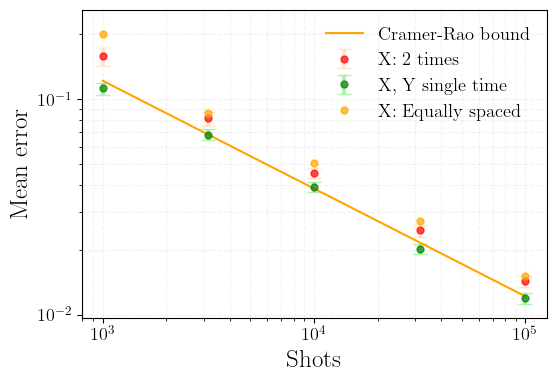

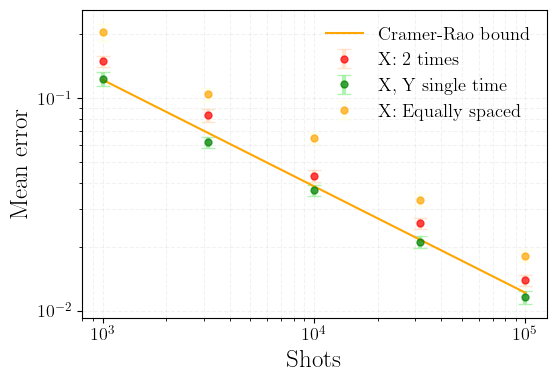

In [25]:
# Data Load Paths
user_home = os.path.expanduser("~")
file_path_a = os.path.join(graphs, 'errors_optimal_a.xlsx')
file_path_w = os.path.join(graphs, 'errors_optimal_w.xlsx')

# Load Data for Decay Error (A)
data_a = pd.read_excel(file_path_a)
shots = data_a["shots"].values
errors_fisher_median_a_o = data_a["errors_fisher_median_a"].values
errors_fisher_std_a_o = data_a["errors_fisher_std_a"].values
errors_local_median_a_o = data_a["errors_local_median_a"].values
errors_local_std_a_o = data_a["errors_local_std_a"].values
errors_uniform_median_a_o = data_a["errors_uniform_median_a"].values
errors_uniform_std_a_o = data_a["errors_uniform_std_a"].values
errors_uniform_median_X_a_o = data_a["errors_uniform_median_X_a"].values
errors_uniform_std_X_a_o = data_a["errors_uniform_std_X_a"].values

# Load Data for Frequency Error (W)
data_w = pd.read_excel(file_path_w)
errors_fisher_median_w_o = data_w["errors_fisher_median_w"].values
errors_fisher_std_w_o = data_w["errors_fisher_std_w"].values
errors_local_median_w_o = data_w["errors_local_median_w"].values
errors_local_std_w_o = data_w["errors_local_std_w"].values
errors_uniform_median_w_o = data_w["errors_uniform_median_w"].values
errors_uniform_std_w_o = data_w["errors_uniform_std_w"].values
errors_uniform_median_X_w_o = data_w["errors_uniform_median_X_w"].values
errors_uniform_std_X_w_o = data_w["errors_uniform_std_X_w"].values

# Plot Frequency Error (W)
plt.figure()
# plt.errorbar(shots, errors_uniform_median_w_o, yerr=errors_uniform_std_w_o, fmt='o', capsize=5,
#              ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(shots, errors_fisher_median_w_o, yerr=errors_fisher_std_w_o, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: 2 times', alpha=0.7)
plt.errorbar(shots, errors_local_median_w_o, yerr=errors_local_std_w_o, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y single time', alpha=0.7)
plt.errorbar(shots, errors_uniform_median_X_w_o, yerr=errors_uniform_std_X_w_o, fmt='o', capsize=5,
             ecolor='lightyellow', elinewidth=3, color='orange', markersize=5, label='X: Equally spaced', alpha=0.7)

plt.plot(shots, np.e / np.sqrt(shots / 2), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error')
plt.yscale('log')
plt.xscale('log')
# plt.title("Frequency Error")
plt.legend()
plt.savefig(os.path.join(graphs, "shots_errors_optimal_w.png"))

# Plot Decay Error (A)
plt.figure()
# plt.errorbar(shots, errors_uniform_median_a_o, yerr=errors_uniform_std_a_o, fmt='o', capsize=5,
#              ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(shots, errors_fisher_median_a_o, yerr=errors_fisher_std_a_o, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: 2 times', alpha=0.7)
plt.errorbar(shots, errors_local_median_a_o, yerr=errors_local_std_a_o, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y single time', alpha=0.7)
plt.errorbar(shots, errors_uniform_median_X_a_o, yerr=errors_uniform_std_X_a_o, fmt='o', capsize=5, ecolor='lightyellow',
             elinewidth=3, color='orange', markersize=5, label='X: Equally spaced', alpha=0.7)
plt.plot(shots, np.e / np.sqrt(shots / 2), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error')
plt.yscale('log')
plt.xscale('log')
# plt.title("Decay Error")
plt.legend()
plt.savefig(os.path.join(graphs, "shots_errors_optimal_a.png"))
dev = np.mean([(np.e / np.sqrt(shots[i] / 2))/errors_local_median_w_o[i] for i in range(len(shots))])
print(dev)
ratio = np.mean(errors_local_std_w_o/errors_local_median_w_o)
print(ratio)

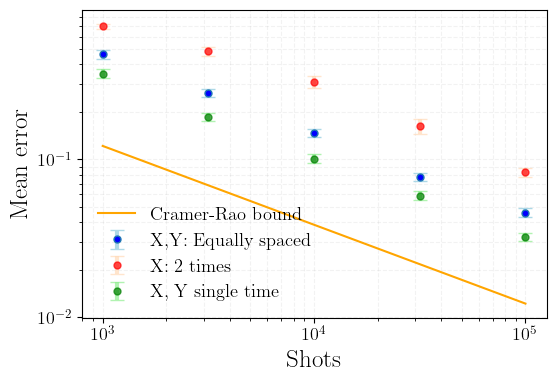

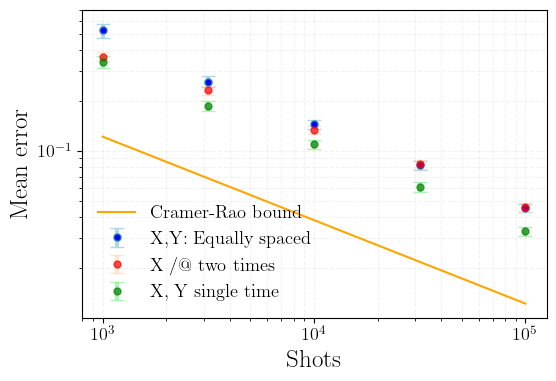

In [26]:
# Data Load Paths
user_home = os.path.expanduser("~")
file_path_a = os.path.join(graphs, 'errors_non_optimal_a.xlsx')
file_path_w = os.path.join(graphs, 'errors_non_optimal_w.xlsx')

# Load Data for Decay Error (A)
data_a = pd.read_excel(file_path_a)
shots = data_a["shots"].values
errors_fisher_median_a_n = data_a["errors_fisher_median_a"].values
errors_fisher_std_a_n = data_a["errors_fisher_std_a"].values
errors_local_median_a_n = data_a["errors_local_median_a"].values
errors_local_std_a_n = data_a["errors_local_std_a"].values
errors_uniform_median_a_n = data_a["errors_uniform_median_a"].values
errors_uniform_std_a_n = data_a["errors_uniform_std_a"].values
errors_uniform_median_X_a_n = data_a["errors_uniform_median_X_a"].values
errors_uniform_std_X_a_n = data_a["errors_uniform_std_X_a"].values

# Load Data for Frequency Error (W)
data_w = pd.read_excel(file_path_w)
errors_fisher_median_w_n = data_w["errors_fisher_median_w"].values
errors_fisher_std_w_n = data_w["errors_fisher_std_w"].values
errors_local_median_w_n = data_w["errors_local_median_w"].values
errors_local_std_w_n = data_w["errors_local_std_w"].values
errors_uniform_median_w_n = data_w["errors_uniform_median_w"].values
errors_uniform_std_w_n = data_w["errors_uniform_std_w"].values
errors_uniform_median_X_w_n = data_w["errors_uniform_median_X_w"].values
errors_uniform_std_X_w_n = data_w["errors_uniform_std_X_w"].values

# Plot Frequency Error (W)
plt.figure()
plt.errorbar(shots, errors_uniform_median_w_n, yerr=errors_uniform_std_w_n, fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(shots, errors_fisher_median_w_n, yerr=errors_fisher_std_w_n, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: 2 times', alpha=0.7)
plt.errorbar(shots, errors_local_median_w_n, yerr=errors_local_std_w_n, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y single time', alpha=0.7)
plt.plot(shots, np.e / np.sqrt(shots / 2), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error')
plt.yscale('log')
plt.xscale('log')
# plt.title("Frequency Error")
plt.legend()
plt.savefig(os.path.join(graphs, "shots_errors_non_optimal_w.png"))

# Plot Decay Error (A)
plt.figure()
plt.errorbar(shots, errors_uniform_median_a_n, yerr=errors_uniform_std_a_n, fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(shots, errors_fisher_median_a_n, yerr=errors_fisher_std_a_n, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X /@ two times', alpha=0.7)
plt.errorbar(shots, errors_local_median_a_n, yerr=errors_local_std_a_n, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y single time', alpha=0.7)
plt.plot(shots, np.e / np.sqrt(shots / 2), '-', label='Cramer-Rao bound', color='orange')
plt.xlabel('Shots')
plt.ylabel('Mean error')
plt.yscale('log')
plt.xscale('log')
# plt.title("Decay Error")
plt.legend()
plt.savefig(os.path.join(graphs, "shots_errors_non_optimal_a.png"))

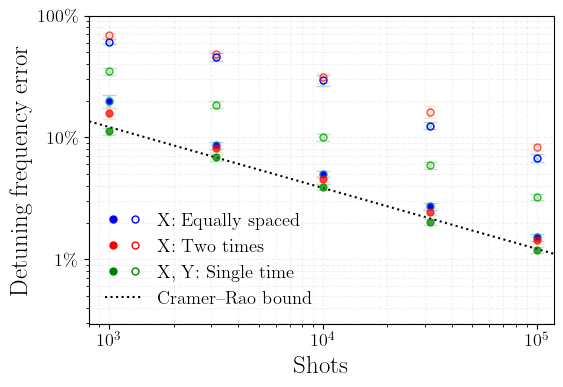

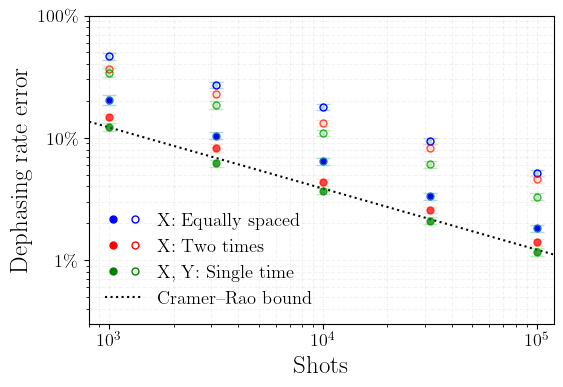

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.legend_handler as legend_handler

def plot_shots_errors(
    shots,
    # Optimal data
    uniform_median_opt, uniform_std_opt,
    fisher_median_opt, fisher_std_opt,
    local_median_opt, local_std_opt,
    uniform_median_X_opt, uniform_std_X_opt,
    # Non-optimal data
    uniform_median_nonopt, uniform_std_nonopt,
    fisher_median_nonopt, fisher_std_nonopt,
    local_median_nonopt, local_std_nonopt,
    uniform_median_X_nonopt, uniform_std_X_nonopt,
    # Plot configuration
    y_label,
    save_path
):
    """
    Create a log-log plot of detuning/dephasing rate errors vs shots
    for both optimal and non-optimal data series, plus the CRB line
    and a custom legend.

    Parameters
    ----------
    shots : array-like
        The x-values (number of shots).
    uniform_median_opt, uniform_std_opt, fisher_median_opt, fisher_std_opt,
    local_median_opt, local_std_opt : array-like
        Median and std for the "optimal" sets (uniform, fisher, local).
    uniform_median_nonopt, uniform_std_nonopt, fisher_median_nonopt, fisher_std_nonopt,
    local_median_nonopt, local_std_nonopt : array-like
        Median and std for the "non-optimal" sets (uniform, fisher, local).
    y_label : str
        The label for the y-axis.
    save_path : str
        Full path (including filename) to save the resulting figure.
    """

    plt.figure(figsize=(6, 4))

    # --- Optimal series (solid markers) ---
    # plt.errorbar(
    #     shots, uniform_median_opt, yerr=uniform_std_opt,
    #     fmt='o', capsize=5, ecolor='lightblue', elinewidth=3,
    #     markerfacecolor='blue', markersize=5
    # )
    plt.errorbar(
        shots, uniform_median_X_opt, yerr=uniform_std_X_opt,
        fmt='o', capsize=5, ecolor='lightblue', elinewidth=3,
        markerfacecolor='blue', markersize=5
    )
    plt.errorbar(
        shots, fisher_median_opt, yerr=fisher_std_opt,
        fmt='o', capsize=5, ecolor='peachpuff', elinewidth=3,
        color='red', markersize=5, alpha=0.7
    )
    plt.errorbar(
        shots, local_median_opt, yerr=local_std_opt,
        fmt='o', capsize=5, ecolor='lightgreen', elinewidth=3,
        color='green', markersize=5, alpha=0.7
    )

    # --- Non-optimal series (hollow markers) ---
    # plt.errorbar(
    #     shots, uniform_median_nonopt, yerr=uniform_std_nonopt,
    #     fmt='o', capsize=5, ecolor='lightblue', elinewidth=3,
    #     color='blue', markerfacecolor='none', markersize=5
    # )
    plt.errorbar(
        shots, uniform_median_X_nonopt, yerr=uniform_std_X_nonopt,
        fmt='o', capsize=5, ecolor='lightblue', elinewidth=3,
        color='blue', markerfacecolor='none', markersize=5
    )
    plt.errorbar(
        shots, fisher_median_nonopt, yerr=fisher_std_nonopt,
        fmt='o', capsize=5, ecolor='peachpuff', elinewidth=3,
        color='red', markerfacecolor='none', markersize=5, alpha=0.7
    )
    plt.errorbar(
        shots, local_median_nonopt, yerr=local_std_nonopt,
        fmt='o', capsize=5, ecolor='lightgreen', elinewidth=3,
        color='green', markerfacecolor='none', markersize=5, alpha=0.7
    )

    more_shots = np.logspace(2, 6, 10)

    # --- Cramér–Rao bound ---
    line_crb, = plt.plot(
        more_shots, np.e / np.sqrt(more_shots / 2), ':',
        color='black', label='Cramer-Rao bound'
    )

    # --- Custom Legend Handles ---
    blue_full   = mlines.Line2D([], [], color='blue', marker='o',
                                linestyle='None', markersize=5)
    blue_hollow = mlines.Line2D([], [], color='blue', marker='o',
                                markerfacecolor='none', linestyle='None', markersize=5)

    red_full   = mlines.Line2D([], [], color='red', marker='o',
                               linestyle='None', markersize=5)
    red_hollow = mlines.Line2D([], [], color='red', marker='o',
                               markerfacecolor='none', linestyle='None', markersize=5)

    green_full   = mlines.Line2D([], [], color='green', marker='o',
                                 linestyle='None', markersize=5)
    green_hollow = mlines.Line2D([], [], color='green', marker='o',
                                 markerfacecolor='none', linestyle='None', markersize=5)

    # --- Legend ---
    plt.legend(
        handles=[
            (blue_full, blue_hollow),
            (red_full, red_hollow),
            (green_full, green_hollow),
            line_crb
        ],
        labels=[
            'X: Equally spaced',
            'X: Two times',
            'X, Y: Single time',
            'Cramer–Rao bound'
        ],
        handler_map={tuple: legend_handler.HandlerTuple(ndivide=None)},
        loc='lower left'
    )

    # --- Scale and labels ---
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Shots')
    plt.ylabel(y_label)
    plt.yticks([0.01, 0.1, 1], ['1\%', '10\%', '100\%'])
    plt.xlim(800,120000)
    # --- Save and show ---
    plt.savefig(save_path)
    plt.show()


# ----------------- USAGE EXAMPLE ----------------- #

# Figure 1: 'Detuning frequency error'
plot_shots_errors(
    shots=shots,
    uniform_median_opt=errors_uniform_median_w_o,
    uniform_std_opt=errors_uniform_std_w_o,
    fisher_median_opt=errors_fisher_median_w_o,
    fisher_std_opt=errors_fisher_std_w_o,
    local_median_opt=errors_local_median_w_o,
    local_std_opt=errors_local_std_w_o,
    uniform_median_X_opt=errors_uniform_median_X_w_o,
    uniform_std_X_opt=errors_uniform_std_X_w_o,

    uniform_median_nonopt=errors_uniform_median_w_n,
    uniform_std_nonopt=errors_uniform_std_w_n,
    fisher_median_nonopt=errors_fisher_median_w_n,
    fisher_std_nonopt=errors_fisher_std_w_n,
    local_median_nonopt=errors_local_median_w_n,
    local_std_nonopt=errors_local_std_w_n,
    uniform_median_X_nonopt=errors_uniform_median_X_w_n,
    uniform_std_X_nonopt=errors_uniform_std_X_w_n,
    y_label='Detuning frequency error',
    save_path=os.path.join(graphs, "shots_errors_w.png")
)

# Figure 2: 'Dephasing rate error'
plot_shots_errors(
    shots=shots,
    uniform_median_opt=errors_uniform_median_a_o,
    uniform_std_opt=errors_uniform_std_a_o,
    fisher_median_opt=errors_fisher_median_a_o,
    fisher_std_opt=errors_fisher_std_a_o,
    local_median_opt=errors_local_median_a_o,
    local_std_opt=errors_local_std_a_o,
    uniform_median_X_opt=errors_uniform_median_X_a_o,
    uniform_std_X_opt=errors_uniform_std_X_a_o,

    uniform_median_nonopt=errors_uniform_median_a_n,
    uniform_std_nonopt=errors_uniform_std_a_n,
    fisher_median_nonopt=errors_fisher_median_a_n,
    fisher_std_nonopt=errors_fisher_std_a_n,
    local_median_nonopt=errors_local_median_a_n,
    local_std_nonopt=errors_local_std_a_n,
    uniform_median_X_nonopt=errors_uniform_median_X_a_n,
    uniform_std_X_nonopt=errors_uniform_std_X_a_n,

    y_label='Dephasing rate error',
    save_path=os.path.join(graphs, "shots_errors_a.png")
)


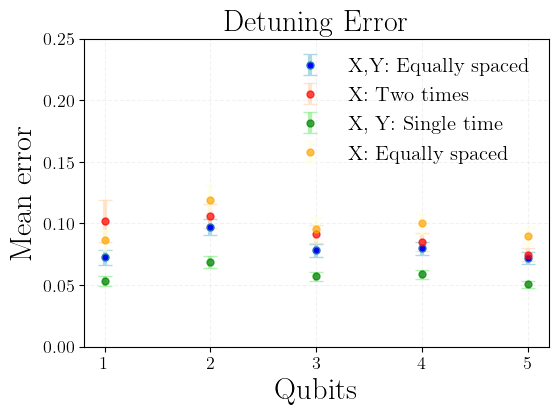

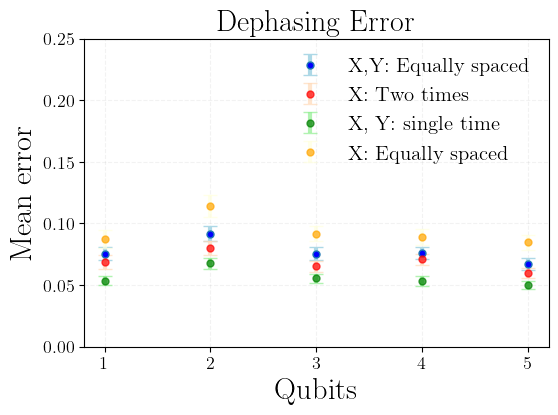

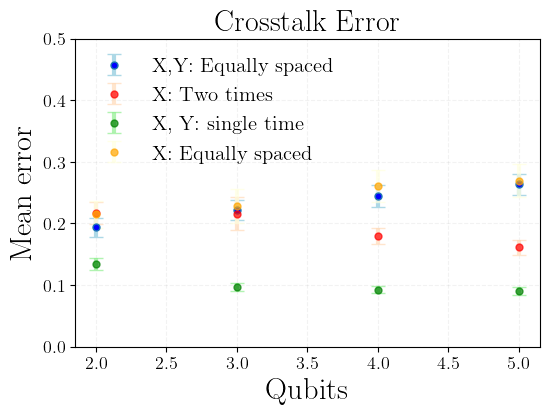

In [17]:
# Data Load Paths
user_home = os.path.expanduser("~")
file_path_a = os.path.join(graphs, 'errors_vs_qubits_a.xlsx')
file_path_w = os.path.join(graphs, 'errors_vs_qubits_w.xlsx')
file_path_j = os.path.join(graphs, 'errors_vs_qubits_j.xlsx')


# Load Data for Decay Error (A)
data_a = pd.read_excel(file_path_a)
shots = data_a["shots"].values
N = data_a["Qubits"].values
errors_fisher_mean_a_o = data_a["errors_fisher_mean_a"].values
errors_fisher_std_a_o = data_a["errors_fisher_std_a"].values
errors_local_mean_a_o = data_a["errors_local_mean_a"].values
errors_local_std_a_o = data_a["errors_local_std_a"].values
errors_uniform_mean_a_o = data_a["errors_uniform_mean_a"].values
errors_uniform_std_a_o = data_a["errors_uniform_std_a"].values
errors_uniform_mean_X_a_o = data_a["errors_uniform_mean_X_a"].values
errors_uniform_std_X_a_o = data_a["errors_uniform_std_X_a"].values

# Load Data for Frequency Error (W)
data_w = pd.read_excel(file_path_w)
N = data_w["Qubits"].values
errors_fisher_mean_w_o = data_w["errors_fisher_mean_w"].values
errors_fisher_std_w_o = data_w["errors_fisher_std_w"].values
errors_local_mean_w_o = data_w["errors_local_mean_w"].values
errors_local_std_w_o = data_w["errors_local_std_w"].values
errors_uniform_mean_w_o = data_w["errors_uniform_mean_w"].values
errors_uniform_std_w_o = data_w["errors_uniform_std_w"].values
errors_uniform_mean_X_w_o = data_w["errors_uniform_mean_X_w"].values
errors_uniform_std_X_w_o = data_w["errors_uniform_std_X_w"].values

# Load Data for Frequency Error (W)
data_j = pd.read_excel(file_path_j)
N = data_j["Qubits"].values
errors_fisher_mean_j_o = data_j["errors_fisher_mean_j"].values
errors_fisher_std_j_o = data_j["errors_fisher_std_j"].values
errors_local_mean_j_o = data_j["errors_local_mean_j"].values
errors_local_std_j_o = data_j["errors_local_std_j"].values
errors_uniform_mean_j_o = data_j["errors_uniform_mean_j"].values
errors_uniform_std_j_o = data_j["errors_uniform_std_j"].values
errors_uniform_mean_X_j_o = data_j["errors_uniform_mean_X_j"].values
errors_uniform_std_X_j_o = data_j["errors_uniform_std_X_j"].values



############################################
# Plot Frequency Error (W)
plt.figure()
plt.errorbar(N, errors_uniform_mean_w_o, yerr=errors_uniform_std_w_o, fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(N, errors_fisher_mean_w_o, yerr=errors_fisher_std_w_o, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: Two times', alpha=0.7)
plt.errorbar(N, errors_local_mean_w_o, yerr=errors_local_std_w_o, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y: Single time', alpha=0.7)
plt.errorbar(N, errors_uniform_mean_X_w_o, yerr=errors_uniform_std_X_w_o, fmt='o', capsize=5,
             ecolor='lightyellow', elinewidth=3, color='orange', markersize=5, label='X: Equally spaced', alpha=0.7)
plt.xlabel('Qubits')
plt.ylabel('Mean error')
plt.ylim(0,0.25)
plt.title("Detuning Error")
# plt.title("Frequency Error")
plt.legend()
plt.savefig(os.path.join(graphs, "errors_vs_qubits_w.png"))

# Plot Decay Error (A)
plt.figure()
plt.errorbar(N, errors_uniform_mean_a_o, yerr=errors_uniform_std_a_o, fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(N, errors_fisher_mean_a_o, yerr=errors_fisher_std_a_o, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: Two times', alpha=0.7)
plt.errorbar(N, errors_local_mean_a_o, yerr=errors_local_std_a_o, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y: single time', alpha=0.7)
plt.errorbar(N, errors_uniform_mean_X_a_o, yerr=errors_uniform_std_X_a_o, fmt='o', capsize=5, ecolor='lightyellow',
             elinewidth=3, color='orange', markersize=5, label='X: Equally spaced', alpha=0.7)
plt.xlabel('Qubits')
plt.ylabel('Mean error')
plt.ylim(0,0.25)
plt.title("Dephasing Error")

# plt.title("Decay Error")
plt.legend()
plt.savefig(os.path.join(graphs, "errors_vs_qubits_a.png"))

# Plot Decay Error (A)
plt.figure()
plt.errorbar(N, errors_uniform_mean_j_o, yerr=errors_uniform_std_j_o, fmt='o', capsize=5,
             ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='X,Y: Equally spaced')
plt.errorbar(N, errors_fisher_mean_j_o, yerr=errors_fisher_std_j_o, fmt='o', capsize=5,
             ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X: Two times', alpha=0.7)
plt.errorbar(N, errors_local_mean_j_o, yerr=errors_local_std_j_o, fmt='o', capsize=5,
             ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y: single time', alpha=0.7)
plt.errorbar(N, errors_uniform_mean_X_j_o, yerr=errors_uniform_std_X_j_o, fmt='o', capsize=5, ecolor='lightyellow',
             elinewidth=3, color='orange', markersize=5, label='X: Equally spaced', alpha=0.7)
plt.xlabel('Qubits')
plt.ylabel('Mean error')
plt.title("Crosstalk Error")

plt.ylim(0,0.5)
# plt.title("Decay Error")
plt.legend()
plt.savefig(os.path.join(graphs, "errors_vs_qubits_a.png"))

In [ ]:
###Stability Region
file_path= os.path.join(graphs, 'Unbiased_estimator.xlsx')

# Load Data for Decay Error (A)
data_a_deph = pd.read_excel(file_path)
fisher_a_mean_deph = data_a_deph["fisher_a_mean"].values
fisher_a_std_deph = data_a_deph["fisher_a_std"].values
local_a_mean_deph = data_a_deph["local_a_mean"].values
local_a_std_deph = data_a_deph["local_a_std"].values
uniform_a_mean_deph = data_a_deph["uniform_a_mean"].values
uniform_a_std_deph = data_a_deph["uniform_a_std"].values
fisher_w_mean_deph = data_a_deph["fisher_w_mean"].values
fisher_w_std_deph = data_a_deph["fisher_w_std"].values
local_w_mean_deph = data_a_deph["local_w_mean"].values
local_w_std_deph = data_a_deph["local_w_std"].values
uniform_w_mean_deph = data_a_deph["uniform_w_mean"].values
uniform_w_std_deph = data_a_deph["uniform_w_std"].values
Decay_deph = data_a_deph["Decay"].values


# plt.plot(Decay,decay_fit_t_mean,label='fit')
# plt.scatter(Decay, fisher_a_mean, label='param')
plt.plot(Decay_deph, fisher_a_mean_deph-Decay_deph, label='X: 2 times', color='red')
plt.plot(Decay_deph, local_a_mean_deph-Decay_deph, label='X, Y single time', color='green')
plt.plot(Decay_deph, uniform_a_mean_deph-Decay_deph, label='X,Y: Equally spaced', color='blue')


plt.axline([2, -1], [2, 1], color='black', linestyle='--', label='Stability region')
# plt.errorbar(Decay, Decay/fisher_a_mean, yerr=fisher_a_std, label='param')
plt.ylim([-0.5, 0.5])
plt.xlabel('Dephasing')
plt.ylabel('Mean difference')
plt.legend()
plt.grid(False)
plt.title('Decay')
plt.savefig(os.path.join(graphs, "Unbiased_estimator_A.png"))

plt.figure()
plt.plot(Decay_deph, ((fisher_w_mean_deph-1)), label='X: 2 times', color='red')
plt.plot(Decay_deph, ((local_w_mean_deph-1)), label='X, Y: single time', color='green')
plt.plot(Decay_deph, ((uniform_w_mean_deph-1)), label='X,Y: Equally spaced', color='blue')
plt.axline([2, -1], [2, 1], color='black', linestyle='--', label='Stability region')
plt.ylim([-0.5, 0.5])
plt.xlabel('Dephasing')
plt.ylabel('Mean difference')
plt.legend()
plt.grid(False)
plt.title('Detuning')
plt.savefig(os.path.join(graphs, "Unbiased_estimator_W.png"))

In [ ]:
file_path= os.path.join(graphs, 'Unbiased_estimator_detuning.xlsx')

# Load Data for Decay Error (A)
data_a = pd.read_excel(file_path)
fisher_a_mean_det = data_a["fisher_a_mean"].values
local_a_mean_det = data_a["local_a_mean"].values
uniform_a_mean_det = data_a["uniform_a_mean"].values
fisher_w_mean_det = data_a["fisher_w_mean"].values
local_w_mean_det = data_a["local_w_mean"].values
uniform_w_mean_det = data_a["uniform_w_mean"].values
W_det = data_a["W"].values


# plt.plot(Decay,decay_fit_t_mean,label='fit')
# plt.scatter(Decay, fisher_a_mean, label='param')
plt.plot(W_det, (np.abs(fisher_a_mean_det-1)), label='X: 2 times', color='red')
plt.plot(W_det, (np.abs(local_a_mean_det-1)), label='X, Y single time', color='green')
plt.plot(W_det, (np.abs(uniform_a_mean_det-1)), label='X,Y: Equally spaced', color='blue')


plt.axline([2, -1], [2, 1], color='black', linestyle='--', label='Stability region')
# plt.errorbar(Decay, Decay/fisher_a_mean, yerr=fisher_a_std, label='param')
plt.ylim([-0.5, 0.5])
plt.xlabel('Detuning')
plt.ylabel('Mean difference')
plt.legend()
plt.grid(False)
plt.title('Decay')
plt.savefig(os.path.join(graphs, "Unbiased_estimator_A.png"))

plt.figure()
plt.plot(W_det, ((fisher_w_mean_det-W_det)), label='X: 2 times', color='red')
plt.plot(W_det, ((local_w_mean_det-W_det)), label='X, Y: single time', color='green')
plt.plot(W_det, ((uniform_w_mean_det-W_det)), label='X,Y: Equally spaced', color='blue')
plt.axline([2, -1], [2, 1], color='black', linestyle='--', label='Stability region')
plt.ylim([-0.5, 0.5])
plt.xlabel('Detuning')
plt.ylabel('Mean difference')
plt.legend()
plt.grid(False)
plt.title('Detuning')
plt.savefig(os.path.join(graphs, "Unbiased_estimator_W.png"))
print()

In [ ]:
bias_wva = fisher_w_mean_deph-1
bias_ava = fisher_a_mean_deph - Decay_deph

bias_avw = fisher_a_mean_det - 1
bias_wvw = fisher_w_mean_det - W_det

bw_w = np.gradient(bias_wvw, W_det)
bw_a = np.gradient(bias_wva, Decay_deph)

ba_w = np.gradient(bias_avw, W_det)
ba_a = np.gradient(bias_ava, Decay_deph)

b = np.array([[bw_w, bw_a], [ba_w, ba_a]])

mat = fisher_matrix(t_fisher,1,1,[N,N])
J = np.linalg.inv(mat)

B = []
for i in range(len(Decay_deph)):
    B.append(b[:,:,i]@J@b[:,:,i].T)


for i in range(len(Decay_deph)):
    c = B[i]
    print(c[1,1])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

omega = 2.0
a = 0.3
t_vals = np.linspace(0, 10, 200)

x_vals = np.cos(omega*t_vals)*np.exp(-a*t_vals)
y_vals = -np.sin(omega*t_vals)*np.exp(-a*t_vals)

plt.plot(x_vals, y_vals, label='Parametric spiral')

# Strategy 1: Two times, only x-values matter
t1, t2 = 1.40, 2.894
x1, y1 = np.cos(omega*t1)*np.exp(-a*t1), -np.sin(omega*t1)*np.exp(-a*t1)
x2, y2 = np.cos(omega*t2)*np.exp(-a*t2), -np.sin(omega*t2)*np.exp(-a*t2)
plt.plot(x1, y1, 'ro', label='Strategy 1 (t1)')
plt.plot(x2, y2, 'ro', label='Strategy 1 (t2)')

# Strategy 2: One time, but both x and y
t0 = 3
x0, y0 = np.cos(omega*t0)*np.exp(-a*t0), -np.sin(omega*t0)*np.exp(-a*t0)
plt.plot(x0, y0, 'gs', label='Strategy 2 (t0)')

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Spiral Representation of Cosine and Sine Decays')
plt.legend()
plt.axis('equal')  # so the spiral is not distorted
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega = -1
    a = 0.5
t_vals = np.linspace(0, 10, 300)

# Define the functions
f1 = np.cos(omega * t_vals) * np.exp(-a * t_vals)   # f1(t) = cos(ωt)*e^{-at}
f2 = -np.sin(omega * t_vals) * np.exp(-a * t_vals)  # f2(t) = -sin(ωt)*e^{-at}

# Choose times for measurement strategies
t1, t2 = 1.4, 2.894  # Strategy 1: two separate times, measure f1
t0 = 2           # Strategy 2: single time, measure both f1 and f2

# Compute the values at these special times
f1_t1 = np.cos(omega * t1) * np.exp(-a * t1)
f1_t2 = np.cos(omega * t2) * np.exp(-a * t2)
f1_t0 = np.cos(omega * t0) * np.exp(-a * t0)
f2_t0 = -np.sin(omega * t0) * np.exp(-a * t0)

# -------------------------------------------------------
# Create the figure and subplots

# -------------------
# 1) Top Subplot: Time-Domain
# -------------------
plt.plot(t_vals, f1)
plt.plot(t_vals, f2)

# Mark points for Strategy 1: two times on f1
plt.plot(t1, f1_t1, 'ro', label='Strategy 1: t1')
plt.plot(t2, f1_t2, 'ro', label='Strategy 1: t2')

# Mark points for Strategy 2: single time t0 on both f1 and f2
plt.plot(t0, f1_t0, 'gs', label='Strategy 2: t0 on f1')
plt.plot(t0, f2_t0, 'gs', label='Strategy 2: t0 on f2')

plt.xlabel('Time t')
plt.ylabel('Amplitude')
plt.title('Time-Domain Plots of f1(t) and f2(t)')
plt.legend(loc='upper right')
plt.grid(True)

# -------------------
# 2) Bottom Subplot: Spiral (x(t), y(t)) = (f1(t), f2(t))
# -------------------
x_vals = f1  # x(t) = cos(ωt)*e^{-at}
y_vals = f2  # y(t) = -sin(ωt)*e^{-at}
ax2.plot(x_vals, y_vals, 'b-', label='Parametric Spiral')

# Mark Strategy 1 points (t1, t2) -- measured f1 only,
# but let's just show their location on the spiral
x1, y1 = (np.cos(omega * t1)*np.exp(-a * t1),
          -np.sin(omega * t1)*np.exp(-a * t1))
x2, y2 = (np.cos(omega * t2)*np.exp(-a * t2),
          -np.sin(omega * t2)*np.exp(-a * t2))

ax2.plot(x1, y1, 'ro')
ax2.plot(x2, y2, 'ro')

# Mark Strategy 2 point (t0) -- single time, measure both x and y
x0, y0 = (np.cos(omega * t0)*np.exp(-a * t0),
          -np.sin(omega * t0)*np.exp(-a * t0))
ax2.plot(x0, y0, 'gs', label='Strategy 2: (x0, y0)')

# ax2.set_xlabel('x(t) = cos(ωt) e^{-at}')
# ax2.set_ylabel('y(t) = -sin(ωt) e^{-at}')
ax2.set_title('Parametric Plot (Spiral) in the (x,y) Plane')
ax2.legend(loc='upper right')
ax2.grid(True)
ax2.axis('equal')  # So the spiral isn't distorted

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
omega = 2.0
a = 0.3
t_vals = np.linspace(0, 10, 500)

# Define the functions
f1 = np.cos(omega * t_vals) * np.exp(-a * t_vals)   # f1(t) = cos(ωt) e^{-at}
f2 = -np.sin(omega * t_vals) * np.exp(-a * t_vals)  # f2(t) = -sin(ωt) e^{-at}

# Measurement points
t1, t2 = 2.0, 5.0  # Strategy 1: measure f1 at two times
t0 = 3.0           # Strategy 2: measure both f1 and f2 at one time

# Compute values at measurement points
f1_t1, f2_t1 = np.cos(omega * t1)*np.exp(-a * t1), -np.sin(omega * t1)*np.exp(-a * t1)
f1_t2, f2_t2 = np.cos(omega * t2)*np.exp(-a * t2), -np.sin(omega * t2)*np.exp(-a * t2)
f1_t0, f2_t0 = np.cos(omega * t0)*np.exp(-a * t0), -np.sin(omega * t0)*np.exp(-a * t0)

# Create the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')

# Plot the 3D helical spiral
ax.plot(f1, f2, t_vals, label='Helical trajectory $(f_1(t), f_2(t), t)$', color='blue', lw=2)

# Strategy 1: Highlight points at t1 and t2
ax.scatter(f1_t1, 0, t1, color='red', s=100, label='Strategy 1: Measure $f_1$ at $t_1$ and $t_2$', zorder=10)
ax.scatter(f1_t2, 0, t2, color='red', s=100, zorder=10)
ax.plot([f1_t1, f1_t1], [0, 0], [0, t1], 'r--', lw=1)  # Projection to x-t plane
ax.plot([f1_t2, f1_t2], [0, 0], [0, t2], 'r--', lw=1)  # Projection to x-t plane

# Strategy 2: Highlight point at t0
ax.scatter(f1_t0, f2_t0, t0, color='green', s=120, label='Strategy 2: Measure $(f_1, f_2)$ at $t_0$', zorder=10)
ax.plot([f1_t0, f1_t0], [0, f2_t0], [t0, t0], 'g--', lw=1)  # Projection to x-y plane
ax.plot([f1_t0, f1_t0], [0, 0], [0, t0], 'g--', lw=1)       # Projection to x-t plane
ax.plot([0, f1_t0], [f2_t0, f2_t0], [t0, t0], 'g--', lw=1)  # Projection to y-t plane

# Format the axes
ax.set_xlabel(r'$f_1(t) = \cos(\omega t) e^{-at}$', labelpad=15, fontsize=12)
ax.set_ylabel(r'$f_2(t) = -\sin(\omega t) e^{-at}$', labelpad=15, fontsize=12)
ax.set_zlabel(r'$t$', labelpad=15, fontsize=12)
ax.set_title('Elegant Visualization of Measurement Strategies', fontsize=14, pad=20)

# Add gridlines for better depth perception
ax.xaxis._axinfo['grid'].update(color='gray', linestyle='dotted', linewidth=0.5)
ax.yaxis._axinfo['grid'].update(color='gray', linestyle='dotted', linewidth=0.5)
ax.zaxis._axinfo['grid'].update(color='gray', linestyle='dotted', linewidth=0.5)

# Set limits and aspect ratio
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 10])
ax.view_init(elev=20, azim=240)  # Adjust the angle for better visualization
ax.legend(loc='upper right', fontsize=10, frameon=True)

plt.tight_layout()
plt.show()
